Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
#Uploading the data gold price dataset to pandas dataframe
df = pd.read_csv('/content/Gold_Price_Data.csv')

In [3]:
#printing first 5 rows of the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#printing Last 5 rows of the dataset
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# No. of rows and columns in dataset
df.shape


(2290, 6)

In [12]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
# checking missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
# description about the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation

2. Negative Correlation

In [17]:
correlation = df.corr()

<Axes: >

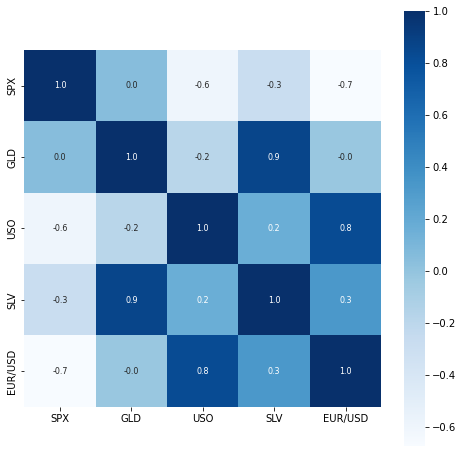

In [22]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

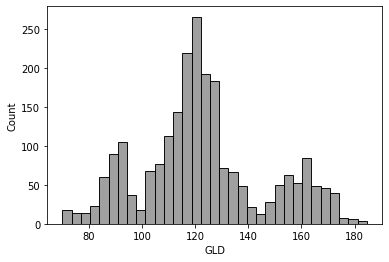

In [53]:
# checking the distribution of the GLD Price
sns.histplot(df['GLD'],color='grey')

splitting the features and targets 

In [29]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [36]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [37]:
print(test_data_prediction)

[168.56069923  81.56230003 116.13310028 127.53070065 120.58240148
 154.81249799 150.49239939 126.05960029 117.67389862 126.09430056
 116.64610089 172.1056012  141.09759878 167.92269895 115.20040008
 117.31900071 139.05860289 170.29890094 158.89550288 160.21639927
 155.14550025 125.21599995 175.98559881 156.94760318 125.21830056
  93.86769964  76.79680001 120.55269999 119.17769977 167.47950069
  88.26030054 125.06099984  90.91090061 117.69790045 121.20429923
 136.22149984 115.39600104 115.50050087 147.27190019 107.51720096
 104.28990245  87.34479788 126.63960029 118.07490036 154.84279923
 119.70769992 108.38619962 108.02889833  93.20040011 127.17949772
  74.28450077 113.69689938 121.41169984 111.10599896 118.87759882
 120.94669961 159.87869945 170.20700031 147.01719663  85.88289856
  94.45540027  86.66819913  90.54050032 118.87860057 126.47220092
 127.50810009 170.23990012 122.18619943 117.55729874  98.42210071
 168.57530081 142.95189845 131.98470203 121.19440231 121.33749941
 119.75940

In [39]:
print(Y_test)

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64


In [40]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888301410992574


Compare the Actual Values and Predicted Values in a Plot

In [41]:
Y_test = list(Y_test)

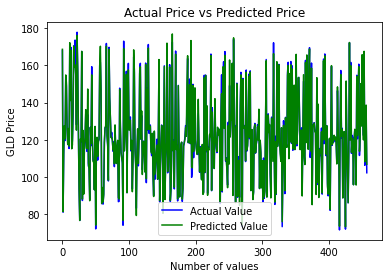

In [45]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()